In [1]:
import geopandas as gpd
import pandas as pd
pd.set_option('display.max_columns', 80)
from shapely.geometry import Point, LineString
from geopandas import GeoDataFrame
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import datetime

In [2]:
# read in classified deeds file
rtt_classifiedRead = gpd.read_file("data/rtt_investors_classified.geojson")



In [4]:
#rtt_classifiedRead.head()

In [5]:
# read in grantor classified deeds file
rtt_grantorRead = gpd.read_file("data/rtt_grantor-investors_classified.geojson")

rtt_grantorCleaned = rtt_grantorRead.filter(['objectid','grantor_inv','grantor_occ','grantor_investor_all'])

rtt_classified = rtt_classifiedRead.merge(
    rtt_grantorCleaned, left_on="objectid", right_on="objectid",how="left")


rtt_classified

,id,C_DIG1,C_DIG1DESC,C_DIG2,C_DIG2DESC,C_DIG3,C_DIG3DESC,OBJECTID,Shape__Are,Shape__Len,VACBLDG,YEAR,address_high,address_low,address_low_frac,address_low_suffix,adjusted_assessed_value,adjusted_cash_consideration,adjusted_fair_market_value,adjusted_local_tax_amount,adjusted_other_consideration,adjusted_state_tax_amount,adjusted_total_consideration,assessed_value,cash_consideration,common_level_ratio,condo_name,discrepancy,display_date_x,display_date_y,document_date,document_id,document_type,elapsed,elapsed_days,fair_market_value,grantees_x_x,grantees_x_y,grantees_y,grantors_x,grantors_y,index_right,inv,investor_all,lat,legal_remarks,lng,local_tax_amount,local_tax_percent,matched_regmap,multi_invest,objectid,occ,opa_account_num,other_consideration,owner_occup,property_count,receipt_date,receipt_num,recording_date,reg_map_id,sort_year_x,sort_year_y,state_tax_amount,state_tax_percent,street_address_x,street_address_y,street_name,street_postdir,street_predir,street_suffix,total_consideration,unit_num,ward,zip_code,geometry,grantor_inv,grantor_occ,grantor_investor_all
0,0,1,Residential,12,Residential Medium,121,Residential Rowhouse,280539,952.673950,165.045972,Fully Vacant,2014,NaN,3083.0,None,None,NaN,58900.0,30699.84,1767.00,NaN,589.0,58900.0,NaN,58900.0,NaN,None,no,2004-04-02T00:00:00,NaT,2004-04-02T00:00:00,50942296,DEED,999,NaN,30699.84,IRWIN LEIGHANNE,None,False,MCCAFFERTY MARIE E; TUCKER MARGARET T,None,285538,0,0.0,-75.109769,None,39.987205,1767.00,100.0,022N240033,NaN,7744699,1,251496000.0,NaN,1,1.0,2004-06-07T00:00:00,None,2004-06-07T00:00:00,022N240033,2004,NaN,589.0,100.0,3083 MEMPHIS ST,None,MEMPHIS,None,None,ST,58900.0,None,25.0,19134.0,POINT (2708216.614 249254.488),0.0,1.0,0.0
1,1,1,Residential,11,Residential Low,112,Residential SemiDetached,424189,2806.505127,278.340314,None,2012,NaN,1221.0,None,None,NaN,1.0,48599.04,NaN,NaN,NaN,1.0,NaN,1.0,NaN,None,no,2004-03-26T00:00:00,NaT,2004-03-26T00:00:00,50942298,DEED,999,NaN,48599.04,OTENG JACOB,None,False,OTENG JACOB; OTENG SHEILA READY,None,424188,0,0.0,-75.088260,None,40.020308,0.00,100.0,130N160110,NaN,7744702,1,234090400.0,NaN,1,1.0,2004-06-07T00:00:00,None,2004-06-07T00:00:00,130N160110,2004,NaN,0.0,100.0,1221 HERBERT ST,None,HERBERT,None,None,ST,1.0,None,23.0,19124.0,POINT (2713877.553 261488.875),NaN,NaN,NaN
2,2,1,Residential,11,Residential Low,112,Residential SemiDetached,530366,3395.618225,298.879760,None,2016,NaN,3631.0,None,None,NaN,92000.0,63936.00,2760.00,NaN,920.0,92000.0,NaN,92000.0,NaN,None,no,2000-05-25T00:00:00,NaT,2000-05-25T00:00:00,50092387,DEED,999,NaN,63936.00,FALLEN PAUL J III,None,False,TAYLOR COLERIDGE; TAYLOR ROBERT TR; TAYLOR RON...,None,531365,0,0.0,-74.997365,None,40.074151,2760.00,100.0,084N180294,NaN,7744935,1,661087900.0,0.0,1,1.0,2000-06-07T00:00:00,None,2000-06-07T00:00:00,084N180294,2000,NaN,920.0,100.0,3631 AVALON ST,None,AVALON,None,None,ST,92000.0,None,66.0,19114.0,POINT (2738711.806 281873.930),0.0,1.0,0.0
3,3,1,Residential,12,Residential Medium,121,Residential Rowhouse,474918,1717.321350,237.627137,None,2015,NaN,3430.0,None,None,NaN,123000.0,43066.56,3690.00,NaN,1230.0,123000.0,NaN,123000.0,NaN,None,no,2004-05-28T00:00:00,NaT,2004-05-28T00:00:00,50942514,DEED,999,NaN,43066.56,RUTA JOSEPH M,None,False,ROWLAND JAMES; ROWLAND JOAN,None,474917,0,0.0,-75.041471,None,40.038977,3690.00,100.0,137N180119,NaN,7744943,1,642110500.0,NaN,1,1.0,2004-06-08T00:00:00,None,2004-06-08T00:00:00,137N180119,2004,NaN,1230.0,100.0,3430 ALDINE ST,None,ALDINE,None,None,ST,123000.0,None,64.0,19136.0,POINT (2726767.396 268684.790),0.0,1.0,0.0
4,4,1,Residential,12,Residential Medium,121,Residential Rowhouse,472582,1555.363403,195.088770,None,2012,NaN,5809.0,None,None,NaN,93000.0,45344.64,2790.00,NaN,930.0,93000.0,NaN,93000.0,NaN,None,no,2004-05-28T00:00:00,NaT,2004-05-28T00:00:00,50942516,DEED,999,NaN,45344.64,DUFFIE JAMIE,None,False,LAVIN BETH,None,472581,0,0.0,-75.078006,None,40.028446,2790.00,100.0,139N020114,NaN,7744945,1,621440200.0,NaN,1,1.0,2004-06-08

In [6]:
# Specify coordinate reference system
rtt_classified.to_crs='epsg:2272'

#rtt_classified.head()

In [7]:
city_limits = gpd.read_file("data/02_flip-investigations_data/philadelphia/PHI_City_Limits.geojson")


In [8]:
city_limits.crs 


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [9]:
PHI_city_limits = city_limits.to_crs(2272)

In [10]:
# filter for grantees
rtt_grantees = rtt_classified.loc[(rtt_classified['inv'] == 1) | (rtt_classified['occ'] == 1)] 
#rtt_investors.to_file("data/02_flip-investigations_data/rtt_investorsOnly.geojson", driver='GeoJSON')

# filter for grantors

rtt_grantors = rtt_classified.loc[(rtt_classified['grantor_inv'] == 1) | (rtt_classified['grantor_occ'] == 1)] 
#rtt_occ.to_file("data/02_flip-investigations_data/rtt_occupantsOnly.geojson", driver='GeoJSON')



rtt_grantors


,id,C_DIG1,C_DIG1DESC,C_DIG2,C_DIG2DESC,C_DIG3,C_DIG3DESC,OBJECTID,Shape__Are,Shape__Len,VACBLDG,YEAR,address_high,address_low,address_low_frac,address_low_suffix,adjusted_assessed_value,adjusted_cash_consideration,adjusted_fair_market_value,adjusted_local_tax_amount,adjusted_other_consideration,adjusted_state_tax_amount,adjusted_total_consideration,assessed_value,cash_consideration,common_level_ratio,condo_name,discrepancy,display_date_x,display_date_y,document_date,document_id,document_type,elapsed,elapsed_days,fair_market_value,grantees_x_x,grantees_x_y,grantees_y,grantors_x,grantors_y,index_right,inv,investor_all,lat,legal_remarks,lng,local_tax_amount,local_tax_percent,matched_regmap,multi_invest,objectid,occ,opa_account_num,other_consideration,owner_occup,property_count,receipt_date,receipt_num,recording_date,reg_map_id,sort_year_x,sort_year_y,state_tax_amount,state_tax_percent,street_address_x,street_address_y,street_name,street_postdir,street_predir,street_suffix,total_consideration,unit_num,ward,zip_code,geometry,grantor_inv,grantor_occ,grantor_investor_all
0,0,1,Residential,12,Residential Medium,121,Residential Rowhouse,280539,952.673950,165.045972,Fully Vacant,2014,NaN,3083.0,None,None,NaN,58900.0,30699.84,1767.00,NaN,589.0,58900.0,NaN,58900.0,NaN,None,no,2004-04-02T00:00:00,NaT,2004-04-02T00:00:00,50942296,DEED,999,NaN,30699.84,IRWIN LEIGHANNE,None,False,MCCAFFERTY MARIE E; TUCKER MARGARET T,None,285538,0,0.0,-75.109769,None,39.987205,1767.00,100.0,022N240033,NaN,7744699,1,251496000.0,NaN,1,1.0,2004-06-07T00:00:00,None,2004-06-07T00:00:00,022N240033,2004,NaN,589.0,100.0,3083 MEMPHIS ST,None,MEMPHIS,None,None,ST,58900.0,None,25.0,19134.0,POINT (2708216.614 249254.488),0.0,1.0,0.0
2,2,1,Residential,11,Residential Low,112,Residential SemiDetached,530366,3395.618225,298.879760,None,2016,NaN,3631.0,None,None,NaN,92000.0,63936.00,2760.00,NaN,920.0,92000.0,NaN,92000.0,NaN,None,no,2000-05-25T00:00:00,NaT,2000-05-25T00:00:00,50092387,DEED,999,NaN,63936.00,FALLEN PAUL J III,None,False,TAYLOR COLERIDGE; TAYLOR ROBERT TR; TAYLOR RON...,None,531365,0,0.0,-74.997365,None,40.074151,2760.00,100.0,084N180294,NaN,7744935,1,661087900.0,0.0,1,1.0,2000-06-07T00:00:00,None,2000-06-07T00:00:00,084N180294,2000,NaN,920.0,100.0,3631 AVALON ST,None,AVALON,None,None,ST,92000.0,None,66.0,19114.0,POINT (2738711.806 281873.930),0.0,1.0,0.0
3,3,1,Residential,12,Residential Medium,121,Residential Rowhouse,474918,1717.321350,237.627137,None,2015,NaN,3430.0,None,None,NaN,123000.0,43066.56,3690.00,NaN,1230.0,123000.0,NaN,123000.0,NaN,None,no,2004-05-28T00:00:00,NaT,2004-05-28T00:00:00,50942514,DEED,999,NaN,43066.56,RUTA JOSEPH M,None,False,ROWLAND JAMES; ROWLAND JOAN,None,474917,0,0.0,-75.041471,None,40.038977,3690.00,100.0,137N180119,NaN,7744943,1,642110500.0,NaN,1,1.0,2004-06-08T00:00:00,None,2004-06-08T00:00:00,137N180119,2004,NaN,1230.0,100.0,3430 ALDINE ST,None,ALDINE,None,None,ST,123000.0,None,64.0,19136.0,POINT (2726767.396 268684.790),0.0,1.0,0.0
4,4,1,Residential,12,Residential Medium,121,Residential Rowhouse,472582,1555.363403,195.088770,None,2012,NaN,5809.0,None,None,NaN,93000.0,45344.64,2790.00,NaN,930.0,93000.0,NaN,93000.0,NaN,None,no,2004-05-28T00:00:00,NaT,2004-05-28T00:00:00,50942516,DEED,999,NaN,45344.64,DUFFIE JAMIE,None,False,LAVIN BETH,None,472581,0,0.0,-75.078006,None,40.028446,2790.00,100.0,139N020114,NaN,7744945,1,621440200.0,NaN,1,1.0,2004-06-08T00:00:00,None,2004-06-08T00:00:00,139N020114,2004,NaN,930.0,100.0,5809 AKRON ST,None,AKRON,None,None,ST,93000.0,None,62.0,19149.0,POINT (2716658.617 264538.633),0.0,1.0,0.0
5,5,1,Residential,11,Residential Low,111,Residential Detached,475314,6734.606567,352.840272,None,2013,NaN,1403.0,None,None,NaN,68500.0,305913.60,2055.00,NaN,685.0,68500.0,NaN,68500.0,NaN,None,no,2004-05-12T00:00:00,NaT,2004-05-12T00:00:00,50941882,DEED,999,NaN,305913.60,NVR INC,None,True,CHAMPION DEVELOPMENT CORPORATION,None,476313,1,1.0,-75.063039,SUB OF 33,40.070579,2055.00,100.0,154N130125,NaN,7744231,0,562065112.

In [11]:
#GRANTEES

#CHECK DATETIME AND CLEAN
rtt_grantees['display_date_x'] = pd.to_datetime(rtt_grantees['display_date_x'])

rtt_grantees_sorted = rtt_grantees.sort_values(by=['street_address_x','display_date_x'])
grantee_resetIndex = rtt_grantees_sorted.reset_index()
grantee_cleanDF = grantee_resetIndex.filter(['id','C_DIG1DESC','C_DIG2DESC','C_DIG3DESC','OBJECTID','YEAR','VACBLDG','adjusted_cash_consideration','adjusted_total_consideration','document_id','document_type','fair_market_value','grantees_x_x','grantors_x','inv','lat','lng','matched_regmap','multi_invest','investor_all','occ','owner_occup','property_count','display_date_x','recording_date','reg_map_id','sort_year_x','street_address_x','total_consideration','ward','unit_num','zip_code','geometry'])



#GROUP AND ROLLING DIFFERENCE

grantee_beg = (grantee_cleanDF.street_address_x == grantee_cleanDF.street_address_x.shift(1))                                                  
grantee_cleanDF['deedDiff2'] = (grantee_cleanDF['display_date_x'] - grantee_cleanDF['display_date_x'].shift(1))/np.timedelta64(1,'D')
grantee_cleanDF['deedDiff'] = grantee_cleanDF['deedDiff2'].where(grantee_beg,0).ffill()

#FILTER OUT DUPLICATES - filter out rows that have same address + display date


rtt_deedDiff_grantee = grantee_cleanDF.drop_duplicates(
    subset = ['street_address_x','display_date_x'],
    keep = 'last').reset_index(drop=True)


#rtt_deedDiff_grantee.to_file("data/02_flip-investigations_data/rtt_deedDiff_grantee.geojson", driver='GeoJSON')

# FILTER FOR FLIPS

#first take out 0s

grantee_no0 = rtt_deedDiff_grantee.loc[rtt_deedDiff_grantee['deedDiff'] != 0.0]
#then filter for less than 1.5 years (575 days)
grantee_Flip = grantee_no0.loc[grantee_no0['deedDiff'] <= 575]
rtt_Flips_grantee = grantee_Flip.loc[grantee_Flip['adjusted_cash_consideration'] > 1]


#rtt_Flips_grantee.to_file("data/02_flip-investigations_data/rtt_Flips_grantee.geojson", driver='GeoJSON')



In [12]:
#GRANTORS

#CHECK DATETIME AND CLEAN
rtt_grantors['display_date_x'] = pd.to_datetime(rtt_grantors['display_date_x'])


rtt_grantors_sorted = rtt_grantors.sort_values(by=['street_address_x','display_date_x'])
grantors_resetIndex = rtt_grantors_sorted.reset_index()
grantors_cleanDF = grantors_resetIndex.filter(['id','C_DIG1DESC','C_DIG2DESC','C_DIG3DESC','OBJECTID','YEAR','VACBLDG','adjusted_cash_consideration','adjusted_total_consideration','document_id','document_type','fair_market_value','grantees_x_x','grantors_x','grantor_inv','grantor_investor_all','lat','lng','matched_regmap','multi_invest','grantor_occ','inv','occ','owner_occup','property_count','display_date_x','recording_date','reg_map_id','sort_year_x','street_address_x','total_consideration','ward','unit_num','zip_code','geometry'])


#GROUP AND ROLLING DIFFERENCE

grantors_beg = (grantors_cleanDF.street_address_x == grantors_cleanDF.street_address_x.shift(1))                                                  
grantors_cleanDF['deedDiff2'] = (grantors_cleanDF['display_date_x'] - grantors_cleanDF['display_date_x'].shift(1))/np.timedelta64(1,'D')
grantors_cleanDF['deedDiff'] = grantors_cleanDF['deedDiff2'].where(grantors_beg,0).ffill()


#FILTER OUT DUPLICATES - filter out rows that have same address + display date
                 
rtt_deedDiff_grantors = grantors_cleanDF.drop_duplicates(
    subset = ['street_address_x','display_date_x'],
    keep = 'last').reset_index(drop=True)

#rtt_deedDiff_grantors.to_file("data/02_flip-investigations_data/rtt_deedDiff_grantors.geojson", driver='GeoJSON')

# FILTER FOR FLIPS 

#first take out 0s

grantors_no0 = rtt_deedDiff_grantors.loc[rtt_deedDiff_grantors['deedDiff'] != 0.0]
#then filter for less than 1.5 years (575 days)
grantor_Flip = grantors_no0.loc[grantors_no0['deedDiff'] <= 575]
rtt_Flips_grantors = grantor_Flip.loc[grantor_Flip['adjusted_cash_consideration'] > 1]

#rtt_Flips_grantors.to_file("data/02_flip-investigations_data/rtt_Flips_grantors.geojson", driver='GeoJSON')

rtt_Flips_grantors.head(50)[['deedDiff','display_date_x','grantors_x','grantees_x_x','street_address_x','grantor_inv','grantor_occ','inv','occ']]


#rtt_Flips_grantors





/Users/adamvosburgh/opt/anaconda3/envs/geo-2021/lib/python3.6/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


,deedDiff,display_date_x,grantors_x,grantees_x_x,street_address_x,grantor_inv,grantor_occ,inv,occ
1,455.0,2006-07-31,SCURON STEVEN,BRYANT DAWN ANN,1 ALLAIRE PL,0.0,1.0,0,1
26,130.0,2004-11-23,CONWAY PATRICK M,MCCARNEY BREINN,1 CHRISTIAN ST UNIT 26L,0.0,1.0,0,1
39,327.0,2014-04-22,MANSFIELD RYAN,NORTON SCOTT; TOSCANI KIMBERLY UPORSKY,1 CHRISTIAN ST UNIT 33,0.0,1.0,0,1
42,327.0,2014-04-22,MANSFIELD RYAN,NORTON SCOTT; TOSCANI KIMBERLY UPORSKY,1 CHRISTIAN ST UNIT 33U,0.0,1.0,0,1
46,31.0,2010-07-13,NATIONAL RESIDENTIAL NOMINEE SERVICES INC,KIM WON M,1 CHRISTIAN ST UNIT 37U,1.0,0.0,0,1
81,418.0,2005-06-28,RICKENBACH JEFFREY,GILFILLAN DAVID P; GILFILLIAN SUSAN B,1 LINDEN TER,0.0,1.0,0,1
82,337.0,2006-05-31,GILFILLAN DAVID P; GILFILLAN SUE B,KOHN KATHRYN; YELLOCK MONICA,1 LINDEN TER,0.0,1.0,0,1
98,134.0,2001-12-12,KELLY THOMAS,AAZAMI HASSAN; AAZAMI MANSOUREH,1 QUEEN ST UNIT 13A,0.0,1.0,0,1
122,130.0,2007-07-16,BLAKE SAMUEL M,KRYMSKAYA VERA P,1 W HAMPTON RD,0.0,1.0,0,1
126,356.0,2018-04-30,GREENVALE DEVELOPMENT LLC,ISSEL ERIK M,1 WISSAHICKON LN,1.0,0.0,0,1


In [13]:
rtt_Flips_grantors.size


2059642

In [14]:
rtt_Flips_grantors_instinv = rtt_Flips_grantors.loc[rtt_Flips_grantors['grantor_inv']==1]
rtt_Flips_grantors_inv = rtt_Flips_grantors.loc[rtt_Flips_grantors['grantor_investor_all']==1]
rtt_Flips_grantors_occ = rtt_Flips_grantors.loc[rtt_Flips_grantors['grantor_occ']==1]
rtt_Flips_grantors_invToOcc = rtt_Flips_grantors.loc[~(rtt_Flips_grantors['grantor_investor_all']==1) & (rtt_Flips_grantors['occ']==1)]

#rtt_Flips_grantors_instinv.to_file("data/02_flip-investigations_data/rtt_Flips_grantors_instinv.geojson", driver='GeoJSON')
#rtt_Flips_grantors_inv.to_file("data/02_flip-investigations_data/rtt_Flips_grantors_inv.geojson", driver='GeoJSON')
#rtt_Flips_grantors_invToOcc.to_file("data/02_flip-investigations_data/rtt_Flips_grantors_invToOcc.geojson", driver='GeoJSON')
                                                     
#rtt_Flips_grantors_inv.head(20)[['deedDiff','display_date_x','grantors_x','grantees_x_x','street_address_x','occ','grantor_inv','grantor_investor_all','grantor_occ']]                                                
                                                
#rtt_owner_check = rtt_investors.loc[rtt_investors['owner_occup'] == 1] 
print(rtt_Flips_grantors_instinv.shape)
print(rtt_Flips_grantors_inv.shape)
print(rtt_Flips_grantors_invToOcc.shape)

(23763, 37)
(38107, 37)
(15552, 37)


<AxesSubplot:>

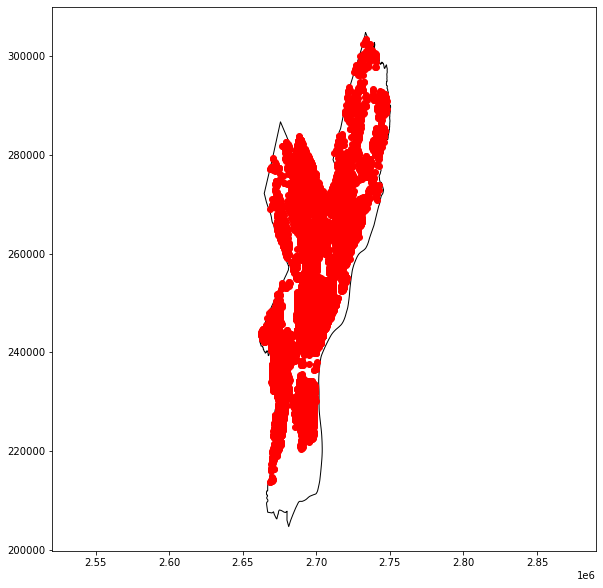

In [15]:
fig, ax = plt.subplots(figsize=(10,10))

ax.set_box_aspect(aspect=1)

PHI_city_limits.plot(ax=ax, color='white', edgecolor='black')


#rtt_classified.plot(ax=ax, color='blue')

#rtt_investors.plot(ax=ax, color = 'blue')
#rtt_Flips_grantee.plot(ax=ax, color = 'purple')


rtt_Flips_grantors_instinv.plot(ax=ax, color = 'red')





In [16]:
# All grantors plot
#total_bar = total.reset_index()
#f, (ax1) = plt.subplots(1,1,figsize=(40, 10))
#sns.set(style="white")

#plt.plot(rtt_Flips_grantors['sort_year_x'], marker='o', color = 'black')
#plt.plot(total_bar['year'],total_bar['investor_all'], marker='o', color = 'black')
#plt.plot(total_bar['year'],total_bar['inv'], marker='o', color = 'black')

<BarContainer object of 55666 artists>

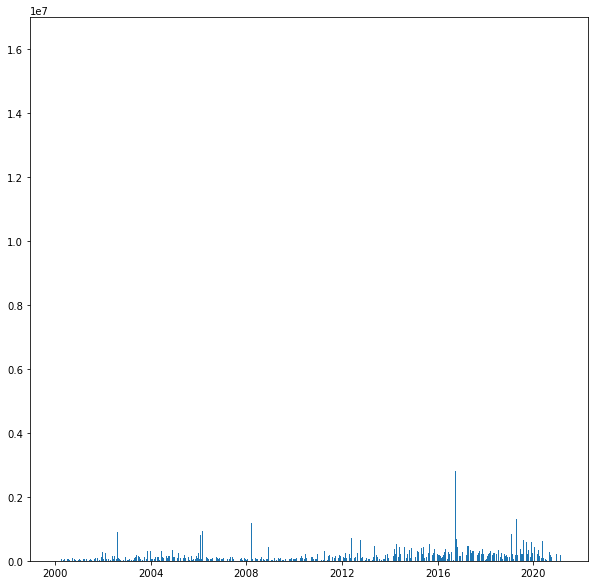

In [17]:
#Grantor investor bar graph

f, (ax1) = plt.subplots(1,1,figsize=(10, 10))
# sns.set(style="white")

plt.bar(rtt_Flips_grantors['display_date_x'],rtt_Flips_grantors['fair_market_value'])

#plt.scatter(rtt_Flips_grantors['display_date_x'],rtt_Flips_grantors['fair_market_value'])


In [18]:
# Calculations

print(rtt_Flips_grantors.size/rtt_classified.size)
print(rtt_Flips_grantors_inv.size/rtt_Flips_grantors.size)
print(rtt_Flips_grantors_invToOcc.size/rtt_Flips_grantors_inv.size)

0.03784972100090734
0.6845650846117918
0.4081139948041042


(array([3261., 6140., 9707., 7682., 4393., 3852., 3945., 5256., 6331.,
        5099.]),
 array([10967. , 11741.3, 12515.6, 13289.9, 14064.2, 14838.5, 15612.8,
        16387.1, 17161.4, 17935.7, 18710. ]),
 <BarContainer object of 10 artists>)

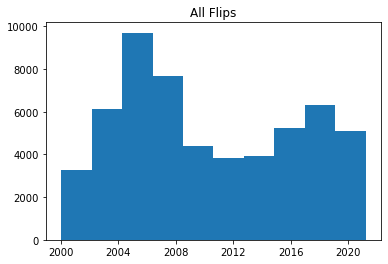

In [19]:
# All Flips Histogram
plt.title(label="All Flips")
plt.hist(rtt_Flips_grantors['display_date_x'])


#plt.savefig("data/02_flip-investigations_data/Hist_All-Flips.png")


(array([[7.56574195e-05, 1.42452179e-04, 2.25209007e-04, 1.78227628e-04,
         1.01920590e-04, 8.93690217e-05, 9.15266850e-05, 1.21942777e-04,
         1.46883509e-04, 1.18300270e-04],
        [7.78899791e-05, 1.51107554e-04, 2.27075551e-04, 1.83632129e-04,
         1.08426297e-04, 9.13107157e-05, 9.82364786e-05, 1.17158060e-04,
         1.33809715e-04, 1.02842608e-04]]),
 array([10967. , 11741.3, 12515.6, 13289.9, 14064.2, 14838.5, 15612.8,
        16387.1, 17161.4, 17935.7, 18710. ]),
 <a list of 2 BarContainer objects>)

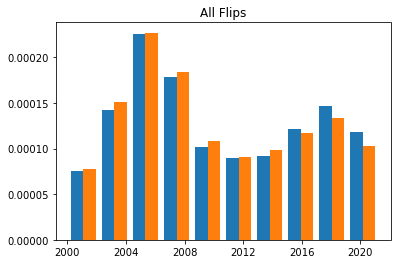

In [20]:
# All Flips (grantor vs. grantee) Histogram
plt.title(label="All Flips")
plt.hist([rtt_Flips_grantors['display_date_x'],rtt_Flips_grantee['display_date_x']],stacked=False, density=True)


#plt.savefig("data/02_flip-investigations_data/Hist_All-Flips_grantorxgrantee.png")

(array([[6.19032138e-05, 9.86973102e-05, 1.50546007e-04, 1.33915293e-04,
         9.83712177e-05, 1.03643045e-04, 1.11414915e-04, 1.53806932e-04,
         2.02938192e-04, 1.76252961e-04],
        [7.96780340e-05, 1.34107180e-04, 1.98093624e-04, 1.54001270e-04,
         1.01537809e-04, 9.93348863e-05, 1.00283838e-04, 1.32005930e-04,
         1.61253971e-04, 1.31192544e-04],
        [7.21646101e-05, 1.69906550e-04, 2.95135816e-04, 2.33102486e-04,
         1.04136273e-04, 6.62685373e-05, 7.09189609e-05, 9.17628241e-05,
         1.04136273e-04, 8.39567558e-05]]),
 array([10967. , 11741.3, 12515.6, 13289.9, 14064.2, 14838.5, 15612.8,
        16387.1, 17161.4, 17935.7, 18710. ]),
 <a list of 3 BarContainer objects>)

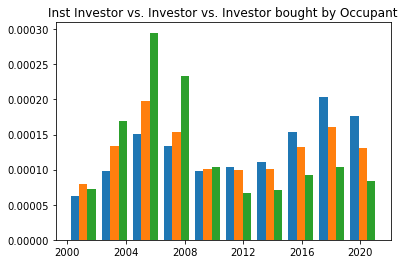

In [21]:
# All Flips (grantor vs. grantee) Histogram
plt.title(label="Inst Investor vs. Investor vs. Investor bought by Occupant")
plt.hist([rtt_Flips_grantors_instinv['display_date_x'],rtt_Flips_grantors_inv['display_date_x'],rtt_Flips_grantors_invToOcc['display_date_x']],stacked=False, density=True)




#plt.savefig("data/02_flip-investigations_data/Hist_Group-Comparison.png")

In [43]:

instinvYear = rtt_Flips_grantors_instinv.groupby([rtt_Flips_grantors_instinv['display_date_x'].dt.year.rename('year')]).agg({'count'})
instinvYear = instinvYear["id"]
instinvYear['year'] = instinvYear.index


invToOccYear = rtt_Flips_grantors_invToOcc.groupby([rtt_Flips_grantors_invToOcc['display_date_x'].dt.year.rename('year')]).agg({'count'})
invToOccYear = invToOccYear["id"]
invToOccYear['year'] = invToOccYear.index


invYear = rtt_Flips_grantors_inv.groupby([rtt_Flips_grantors_inv['display_date_x'].dt.year.rename('year')]).agg({'count'})
invYear = invYear["id"]
invYear['year'] = invYear.index

occYear = rtt_Flips_grantors_occ.groupby([rtt_Flips_grantors_occ['display_date_x'].dt.year.rename('year')]).agg({'count'})
occYear = occYear["id"]
occYear['year'] = occYear.index


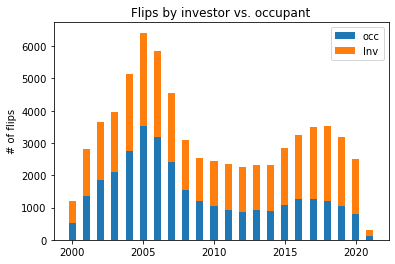

In [52]:
fig, ax = plt.subplots()
width=0.5


ax.bar(occYear['year'],occYear['count'], width, label='occ')
ax.bar(invYear['year'],invYear['count'], width, bottom=occYear['count'], label='Inv')

ax.set_ylabel('# of flips')
ax.set_title('Flips by investor vs. occupant')
ax.legend()

plt.savefig("data/02_flip-investigations_data/CHARTS/210714/Bar_Inv-Occ-Flips.png")

plt.show()


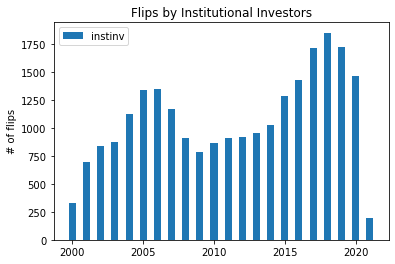

In [53]:
fig, ax = plt.subplots()
width=0.5


ax.bar(instinvYear['year'],instinvYear['count'], width, label='instinv')

ax.set_ylabel('# of flips')
ax.set_title('Flips by Institutional Investors')

ax.legend()

plt.savefig("data/02_flip-investigations_data/CHARTS/210714/Bar_instInv-Flips.png")

plt.show()


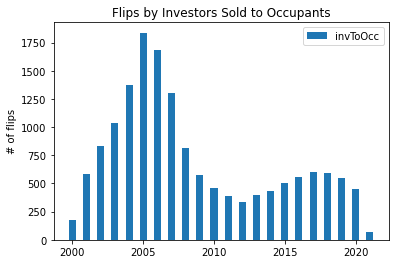

In [54]:
fig, ax = plt.subplots()
width=0.5


ax.bar(invToOccYear['year'],invToOccYear['count'], width, label='invToOcc')

ax.set_ylabel('# of flips')
ax.set_title('Flips by Investors Sold to Occupants')

ax.legend()

plt.savefig("data/02_flip-investigations_data/CHARTS/210714/Bar_invToOcc-Flips.png")


plt.show()


In [ ]:
# Investor Flips Histogram
plt.title(label="Flips by Investor")
plt.hist(rtt_Flips_grantors_inv['display_date_x'])


#plt.savefig("data/02_flip-investigations_data/Hist_Inv-Flips.png")

In [ ]:
# NON - Investor Flips Histogram
plt.title(label="Flips by Non - Investor")
plt.hist(rtt_Flips_grantors_occ['display_date_x'])


#plt.savefig("data/02_flip-investigations_data/Hist_Occ-Flips.png")

In [ ]:
# Investor to Occupant Flips Histogram
plt.title(label="Flips by Investor bought by Occupant")
plt.hist(rtt_Flips_grantors_invToOcc['display_date_x'])


#plt.savefig("data/02_flip-investigations_data/Hist_InvToOcc-Flips.png")

In [ ]:
# Investor vs. Investor to Occupant Flips Histogram
plt.title(label="Flips by Investor vs. by Occupant")
plt.hist([rtt_Flips_grantors_inv['display_date_x'],rtt_Flips_grantors_occ['display_date_x']], stacked=False, density=True)


plt.savefig("data/02_flip-investigations_data/Hist_Inv+Occ-Flips.png")


In [ ]:
# Grantor Flips Scatter

plt.title(label="Grantor Flips x Price")
plt.scatter(rtt_Flips_grantors['display_date_x'],rtt_Flips_grantors['deedDiff'])
#plt.savefig("data/02_flip-investigations_data/Scat_Owner-Flips.png")





In [ ]:
#grantor Flips Violin Plot


#plt.title(label="Investor Flips x Price")
#plt.violinplot(rtt_Flips_grantors['display_date_x'],rtt_Flips_grantors['deedDiff'])



In [ ]:
#rtt_deedDiff_grantee.head(30)[['deedDiff','display_date_x','street_address_x']]

#rtt_Flips_grantors.head(10)[['deedDiff','display_date_x','grantors_x','grantees_x_x','street_address_x']]

check_all = rtt_classified.loc[(rtt_classified['street_address_x'] == '1000 S COLORADO ST')]

check_all['display_date_x'] = pd.to_datetime(check_all['display_date_x'])
check_all_sorted = check_all.sort_values(by=['street_address_x','display_date_x'])

check_all_sorted.head(20)[['display_date_x','grantors_x','grantees_x_x','street_address_x']]




In [ ]:
#check_deedDiff = grantors_cleanDF.loc[(grantors_cleanDF['street_address_x'] == '1000 S COLORADO ST')]


check_deedDiff = rtt_deedDiff_grantors.loc[(rtt_deedDiff_grantors['street_address_x'] == '1000 S COLORADO ST')]





check_deedDiff.head(20)[['deedDiff','display_date_x','grantors_x','grantees_x_x','street_address_x']]

In [ ]:
check_Flips = rtt_Flips_grantors.loc[(rtt_Flips_grantors['street_address_x'] == '1000 S COLORADO ST')]


check_Flips.head(50)[['deedDiff','display_date_x','grantors_x','grantees_x_x','street_address_x']]


In [62]:
topaddress = rtt_Flips_grantors['street_address_x'].value_counts() 
topaddress


12 HAMILTON CIR         10
2813 BROWN ST            7
720 N DEKALB ST          6
1607 W DAUPHIN ST        6
713 E THOMPSON ST        6
                        ..
2347 N HANCOCK ST        1
753 TIOGA ST             1
8927 DEWEES ST           1
446 E TULPEHOCKEN ST     1
1515 N HOLLYWOOD ST      1
Name: street_address_x, Length: 47988, dtype: int64

In [67]:
#is_redfin = rtt_Flips_grantors['street_address_x'].str.contains('REDFIN')
#rtt_redfin = rtt_Flips_grantors[is_redfin]
#rtt_redfin

is_top = rtt_Flips_grantors['street_address_x'] == '12 HAMILTON CIR'




rtt_top = rtt_Flips_grantors[is_top]
rtt_top.head(20)[['street_address_x','display_date_x','grantors_x','grantees_x_x','deedDiff','adjusted_total_consideration']]







,street_address_x,display_date_x,grantors_x,grantees_x_x,deedDiff,adjusted_total_consideration
23587,12 HAMILTON CIR,2001-09-27,BRAUN MEGHAN AINE; BRAUN SHIMON,JACKSON LISA RYAN; JACKSON THOMAS,97.0,74750.0
23588,12 HAMILTON CIR,2003-01-22,MOYLAN KELLY A,FITZPATRICK RYAN M; PALLOTTA KATHRYN,482.0,128500.0
23589,12 HAMILTON CIR,2003-05-15,CLARK THEODORA NEILSON,SONG FREDERICK S,113.0,129500.0
23592,12 HAMILTON CIR,2008-06-10,FRANCO BLANCA GIL; FRANCO JESUS GAUARDIA; FRAN...,BACHSTEIN BENEDICT J; VETTRAINO MELISSA,239.0,172680.0
23593,12 HAMILTON CIR,2008-07-18,FRIEL BETH A; ZEIGER BRIAN,FOO GABRIEL; KIM NANCY,38.0,190000.0
23595,12 HAMILTON CIR,2011-09-23,COHEN FLORENCE M,COOK ANNE B; TROYER RUSSELL P,49.0,167500.0
23596,12 HAMILTON CIR,2012-02-22,ROBINSON ANITA J,WEISSBERGER JARED,152.0,177500.0
23597,12 HAMILTON CIR,2012-04-23,BROOKFIELD RELOCATION INC; PRUDENTIAL RELOCATI...,PALAPURA BINDU; PALAPURA NAVEEN,61.0,197250.0
23598,12 HAMILTON CIR,2012-10-19,OEI ANDRY,ATTAR RIAD; LAXTON KRISTA,179.0,170000.0
23603,12 HAMILTON CIR,2018-06-27,SCHIPPANG GARY; SCHIPPANG MELODIE,FOX CATHERINE; FOX WILLIAM,318.0,215000.0


In [ ]:
#GRAVEYARD

# check for owner_occ - check is good
#rtt_owner_check = rtt_investors.loc[rtt_investors['owner_occup'] == 1] 
#rtt_owner_check.shape

#_grouped = df.groupby("street_address_x").rolling(window=1).Amount.count()

#rtt_investors_dateindex['flip_time'] = rtt_investors_dateindex.groupby(['street_address_x']).document_date.astype('timedelta64[D]')

#cleanDF['deedDiff'] = cleanDF.groupby(['street_address_x','receipt_date']).receipt_date.apply(lambda x: x - x.iloc[0])
#cleanDF['deedDiff'] /= np.timedelta64 (1, 'D')

#grantors_cleanDF['deedDiff'] = grantors_cleanDF.groupby(['street_address_x','display_date_x']).display_date_x.apply(lambda x: x - x.iloc[0])
#grantors_cleanDF['deedDiff'] /= np.timedelta64 (1, 'D')


#grantors_cleanDF['deedDiff'] = (grantors_cleanDF['display_date_x'] - grantors_cleanDF['display_date_x'].where(grantors_beg).ffill())/np.timedelta64(1,'D')

#grantors_cleanDF['deedDiff']

#grantors_cleanDF['deedDiff'] = grantors_cleanDF.groupby(['display_date_x']).display_date_x.apply(lambda x: x - x.iloc[0]).apply(lambda x:x / np.timedelta64(1, 'D'))
#grantors_cleanDF['deedDiff'] = grantors_cleanDF.groupby('street_address_x')['display_date_x'].diff().fillna(pd.Timedelta(seconds=0))




#rtt_investors.crs = 'epsg:4326'
#PHI_rtt_investors = rtt_investors.to_crs('epsg:2272')

#OCCUPANTS

'''  # FILTER FOR ADDRESS / ZIP THAT APPEARS MOST TIMES

topzip = rtt_classified['zip_code'].value_counts() 
topaddress = rtt_classified['street_address_x'].value_counts() 

#topaddress.head(10)
#rtt_investors_topaddress.to_file("data/rtt_investors_topaddress.geojson", driver ='GeoJSON')

topaddress_1000 = topaddress.iloc[:1000]
addresses=topaddress_1000.index
a_list=list(addresses)
#list2 = ['12 HAMILTON CIR,' '3817 POPLAR ST']

#is_top = rtt_test['street_address_x'].isin(a_list)
is_top = rtt_classified['street_address_x'] == '12 HAMILTON CIR'
#is_top = rtt_test['zip_code'] == 19134
rtt_top = rtt_classified[is_top]
#rtt_top['property_count'].mean()
rtt_top['receipt_date'] = pd.to_datetime(rtt_top.receipt_date)
rtt_top.sort_values(by=['receipt_date'])
rtt_top.shape



#rtt_top.to_html('temp.html') '''

'''
#CHECK DATETIME AND CLEAN
rtt_occ['receipt_date'] = pd.to_datetime(rtt_occ['receipt_date'])

rtt_occ_sorted = rtt_occ.sort_values(by=['street_address_x','receipt_date'])
occ_resetIndex = rtt_occ_sorted.reset_index()
occ_cleanDF = occ_resetIndex.filter(['id','C_DIG1DESC','C_DIG2DESC','C_DIG3DESC','OBJECTID','YEAR','VACBLDG','adjusted_cash_consideration','adjusted_total_consideration','display_date_x','document_date','document_id','document_type','fair_market_value','grantees_x_x','grantors_x','inv','lat','lng','matched_regmap','multi_invest','occ','owner_occup','property_count','receipt_date','recording_date','reg_map_id','sort_year_x','street_address_x','total_consideration','ward','unit_num','zip_code','geometry'])


#GROUP AND ROLLING DIFFERENCE


occ_beg = (occ_cleanDF.street_address_x != occ_cleanDF.street_address_x.shift(1)) 
occ_cleanDF['deedDiff'] = (occ_cleanDF['receipt_date'] - occ_cleanDF['receipt_date'].where(occ_beg).ffill())/np.timedelta64(1,'D')
rtt_deedDiff_occ = occ_cleanDF

#rtt_deedDiff_occ.to_file("data/02_flip-investigations_data/rtt_deedDiff_occ.geojson", driver='GeoJSON')

# FILTER FOR FLIPS

#first take out 0s
occ_no0 = rtt_deedDiff_occ.loc[rtt_deedDiff_occ['deedDiff'] != 0.0]
#then filter for less than 1.5 years (575 days)
rtt_Flips_occ = occ_no0.loc[occ_no0['deedDiff'] <= 575]

#rtt_Flips_occ.to_file("data/02_flip-investigations_data/rtt_Flips_occ.geojson", driver='GeoJSON')
'''

